In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics 
import sklearn.svm as svm 
import sklearn.naive_bayes as naive_bayes
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns 
import json
import nltk
import string
import re


In [2]:
main_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

main_df = main_df.append(test_df)

FileNotFoundError: [Errno 2] No such file or directory: 'train_data.csv'

# 1. PreProcessing

In [3]:
main_df.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",?,?,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1.0,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",?,?,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1.0,7222
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,1,17,0,11008,257,5,0.466926,0.062500,1.0,3964
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,1,28,0,4585,286,5,0.244755,0.085868,1.0,3697
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,3,0,1745,55,1,0.072727,0.115044,1.0,4321


## 1.1 Checking for NULL and "?" values

In [4]:
main_df.isna().sum()

url                              0
webpageDescription               0
alchemy_category                 0
alchemy_category_score           0
avgLinkWordLength                0
AvglinkWithOneCommonWord         0
AvglinkWithTwoCommonWord         0
AvglinkWithThreeCommonWord       0
AvglinkWithFourCommonWord        0
redundancyMeasure                0
embedRatio                       0
framebased                       0
frameTagRatio                    0
domainLink                       0
tagRatio                         0
imageTagRatio                    0
isNews                           0
lengthyDomain                    0
hyperlinkToAllWordsRatio         0
isFrontPageNews                  0
alphanumCharCount                0
linksCount                       0
wordCount                        0
parametrizedLinkRatio            0
spellingErrorsRatio              0
label                         1479
id                               0
dtype: int64

No Null Values exist

In [5]:
(main_df == '?').sum()

url                              0
webpageDescription               0
alchemy_category              2342
alchemy_category_score        2342
avgLinkWordLength                0
AvglinkWithOneCommonWord         0
AvglinkWithTwoCommonWord         0
AvglinkWithThreeCommonWord       0
AvglinkWithFourCommonWord        0
redundancyMeasure                0
embedRatio                       0
framebased                       0
frameTagRatio                    0
domainLink                       0
tagRatio                         0
imageTagRatio                    0
isNews                        2843
lengthyDomain                    0
hyperlinkToAllWordsRatio         0
isFrontPageNews               1248
alphanumCharCount                0
linksCount                       0
wordCount                        0
parametrizedLinkRatio            0
spellingErrorsRatio              0
label                            0
id                               0
dtype: int64

In [6]:
(main_df["isNews"] == '?').sum()

2843

In [7]:
main_df["isNews"].value_counts()

1    4552
?    2843
Name: isNews, dtype: int64

Assuming the other 2843 rows are not news. Making the '?' values to 0

In [8]:
main_df["isNews"].replace("?", 0, inplace = True)

In [9]:
main_df["isNews"].value_counts()

1    4552
0    2843
Name: isNews, dtype: int64

In [10]:
(main_df["isFrontPageNews"] == '?').sum()

1248

In [11]:
main_df["isFrontPageNews"].value_counts()

0    5853
?    1248
1     294
Name: isFrontPageNews, dtype: int64

Assuming they are not front page news. Changing the "?" to 0

In [12]:
main_df["isFrontPageNews"].replace("?", 0, inplace = True)
main_df["isFrontPageNews"] = pd.to_numeric(main_df["isFrontPageNews"])

In [13]:
main_df["isFrontPageNews"].value_counts()

0    7101
1     294
Name: isFrontPageNews, dtype: int64

In [14]:
(main_df["alchemy_category_score"] == '?').sum()

2342

In [15]:
main_df["alchemy_category_score"].value_counts()

?            2342
0.85           82
0.0784091      40
0.849999       12
0.535009       10
             ... 
0.181393        1
0.640928        1
0.638953        1
0.881255        1
0.848075        1
Name: alchemy_category_score, Length: 4806, dtype: int64

In [16]:
main_df["alchemy_category_score"] = main_df["alchemy_category_score"].replace('?', np.nan)
main_df["alchemy_category_score"] = pd.to_numeric(main_df["alchemy_category_score"])
main_df["alchemy_category_score"].describe()

count    5053.000000
mean        0.603334
std         0.212864
min         0.070833
25%         0.452424
50%         0.625616
75%         0.780851
max         0.999426
Name: alchemy_category_score, dtype: float64

In [17]:
main_df["alchemy_category_score"].isna().sum()

2342

Mean and Median are almost same. So, replacing nan values with Median

In [18]:
main_df["alchemy_category_score"].fillna(main_df["alchemy_category_score"].median(), inplace=True)
main_df["alchemy_category_score"].describe()

count    7395.000000
mean        0.610391
std         0.176257
min         0.070833
25%         0.538758
50%         0.625616
75%         0.708279
max         0.999426
Name: alchemy_category_score, dtype: float64

In [19]:
main_df["alchemy_category"].describe()

count     7395
unique      14
top          ?
freq      2342
Name: alchemy_category, dtype: object

In [20]:
main_df["alchemy_category"].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

Changing '?' to a new unknown

In [21]:

main_df["alchemy_category"].replace("?", "unknown", inplace = True)

In [22]:
(main_df == '?').sum()

url                           0
webpageDescription            0
alchemy_category              0
alchemy_category_score        0
avgLinkWordLength             0
AvglinkWithOneCommonWord      0
AvglinkWithTwoCommonWord      0
AvglinkWithThreeCommonWord    0
AvglinkWithFourCommonWord     0
redundancyMeasure             0
embedRatio                    0
framebased                    0
frameTagRatio                 0
domainLink                    0
tagRatio                      0
imageTagRatio                 0
isNews                        0
lengthyDomain                 0
hyperlinkToAllWordsRatio      0
isFrontPageNews               0
alphanumCharCount             0
linksCount                    0
wordCount                     0
parametrizedLinkRatio         0
spellingErrorsRatio           0
label                         0
id                            0
dtype: int64

----------------- all '?' and null values are removed ---------------

## 1.2 Removing useless columns.

<AxesSubplot:>

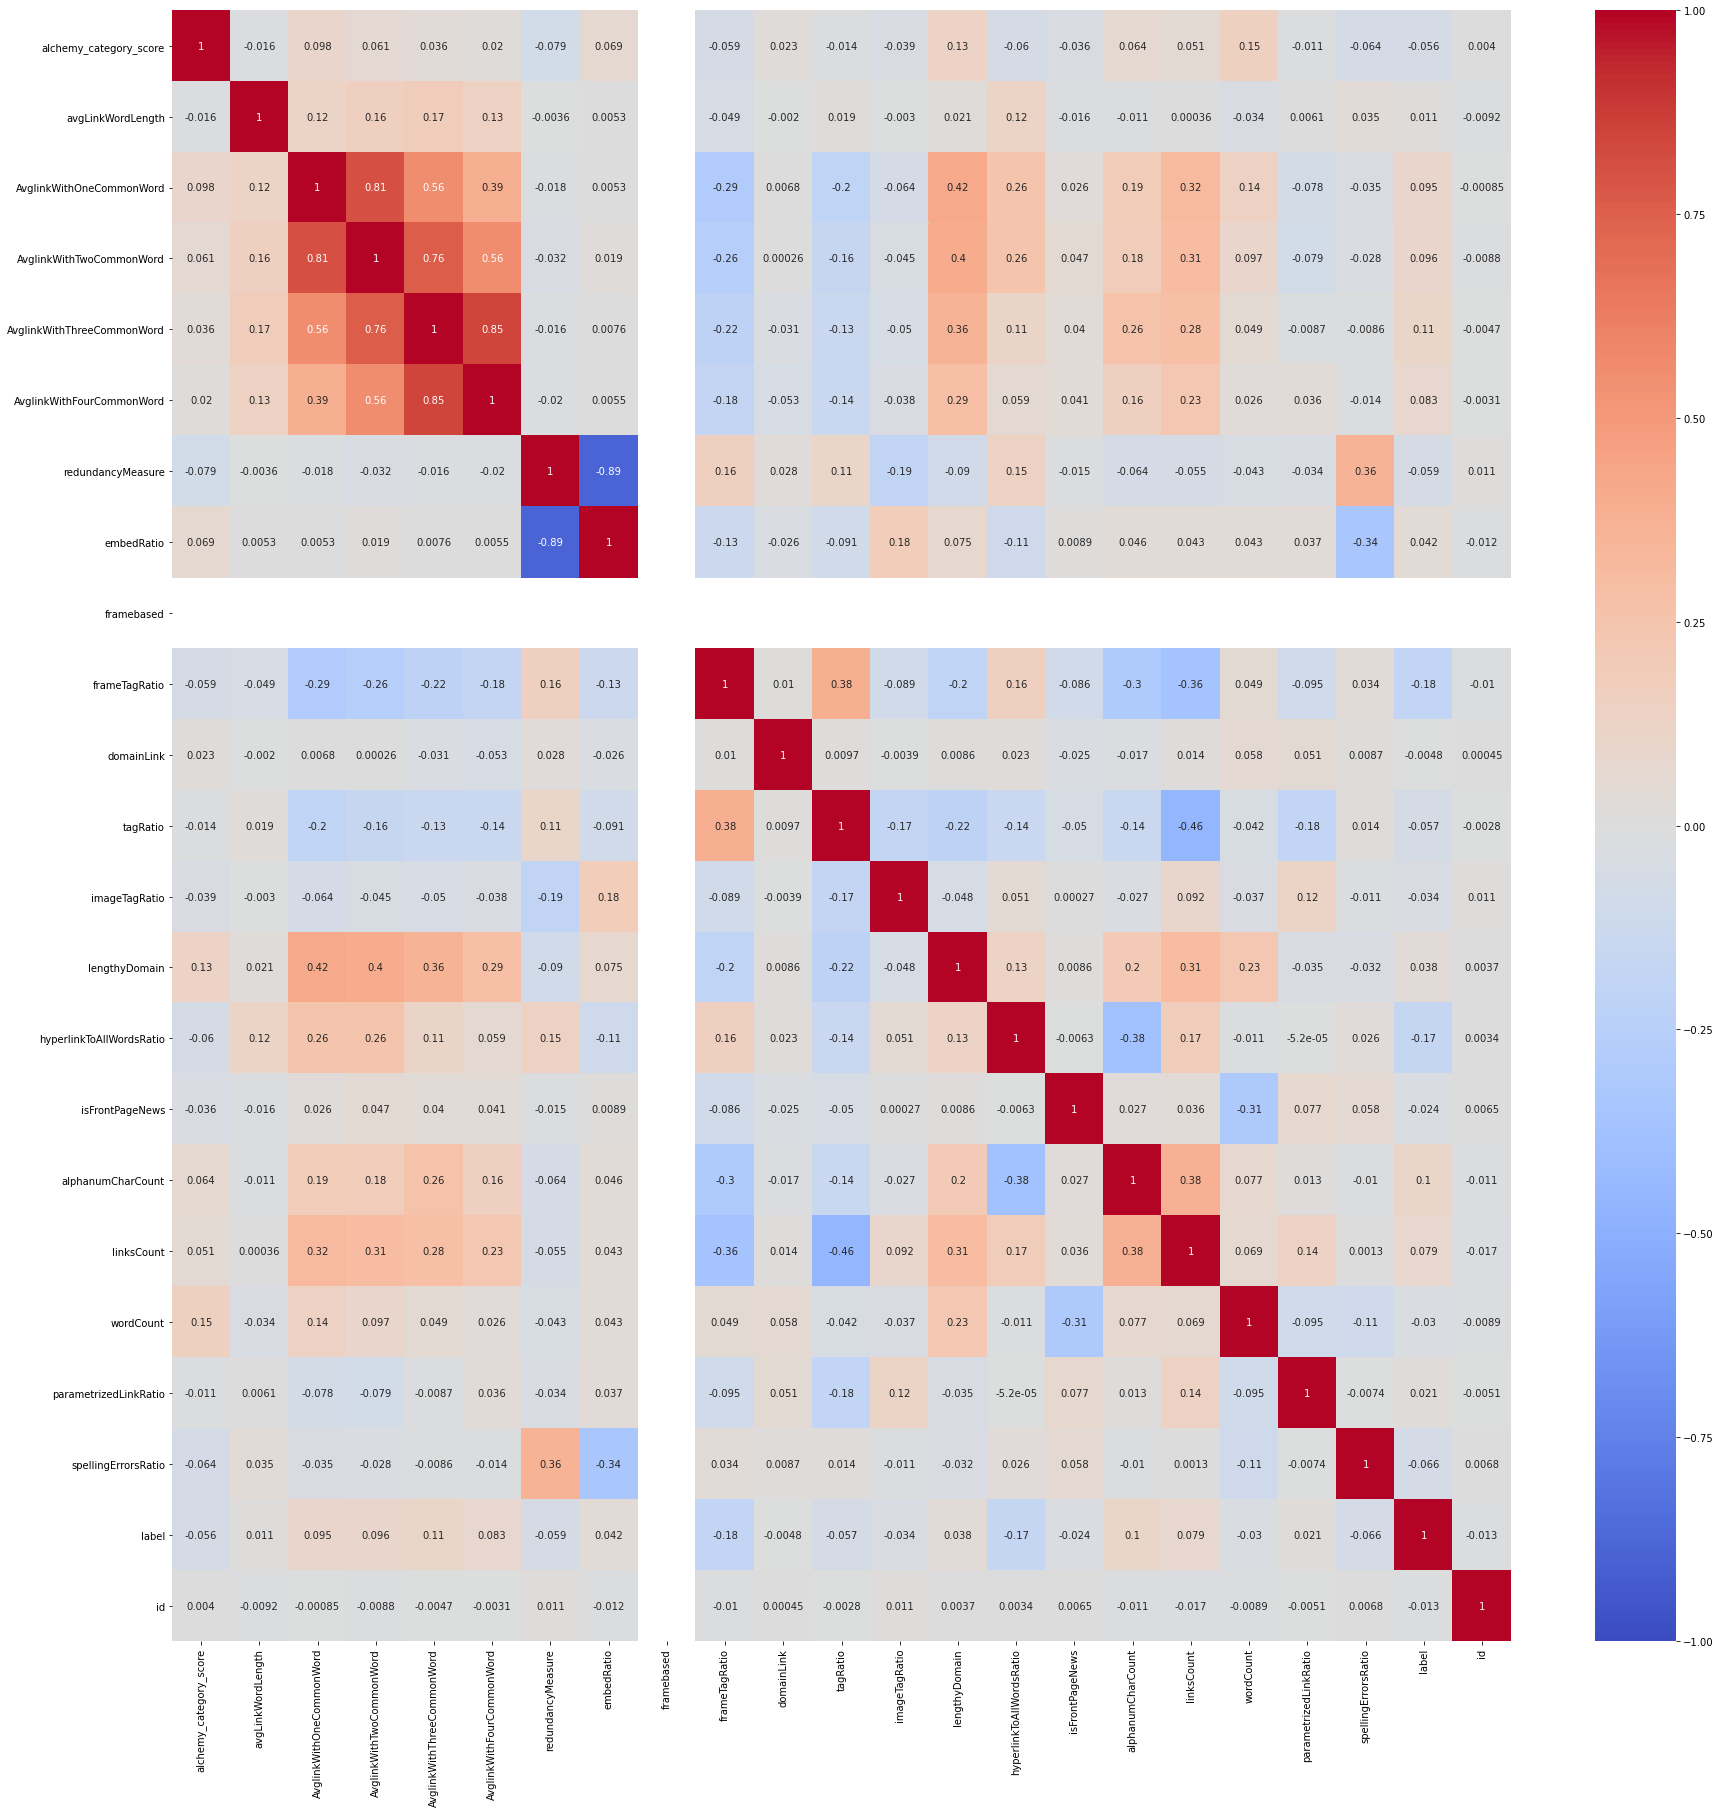

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(main_df.corr(), vmin=-1, cmap="coolwarm", annot=True)

In [24]:
main_df["isFrontPageNews"].value_counts()

0    7101
1     294
Name: isFrontPageNews, dtype: int64

In [25]:
main_df["framebased"].value_counts()

0    7395
Name: framebased, dtype: int64

In [26]:
main_df["domainLink"].value_counts()

0    7238
1     157
Name: domainLink, dtype: int64

In [27]:
columns_to_be_deleted = ["framebased", "domainLink"]
main_df.drop(axis="columns", labels=columns_to_be_deleted, inplace=True)

In [28]:
main_df.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",unknown,0.625616,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1.0,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",unknown,0.625616,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1.0,7222
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,1,17,0,11008,257,5,0.466926,0.062500,1.0,3964
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,1,28,0,4585,286,5,0.244755,0.085868,1.0,3697
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,3,0,1745,55,1,0.072727,0.115044,1.0,4321


In [29]:
main_df.head()

,url,webpageDescription,alchemy_category,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,lengthyDomain,hyperlinkToAllWordsRatio,isFrontPageNews,alphanumCharCount,linksCount,wordCount,parametrizedLinkRatio,spellingErrorsRatio,label,id
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",unknown,0.625616,1.916667,0.047619,0.007937,0.000000,0.000000,0.803797,...,0,34,0,682,126,1,0.531746,0.142857,1.0,3711
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",unknown,0.625616,1.257576,0.141026,0.000000,0.000000,0.000000,1.142857,...,0,12,0,3008,78,1,0.628205,0.000000,1.0,7222
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",science_technology,0.386685,2.024000,0.630350,0.284047,0.233463,0.202335,0.443409,...,1,17,0,11008,257,5,0.466926,0.062500,1.0,3964
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",recreation,0.475039,1.665254,0.419580,0.199301,0.097902,0.066434,0.472649,...,1,28,0,4585,286,5,0.244755,0.085868,1.0,3697
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",computer_internet,0.535009,0.181818,0.036364,0.000000,0.000000,0.000000,0.292614,...,0,3,0,1745,55,1,0.072727,0.115044,1.0,4321


## 1.3 Skew Checking for Numeric data

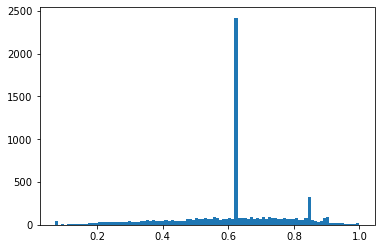

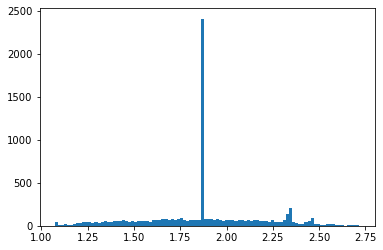

In [30]:
plt.hist(main_df["alchemy_category_score"], bins = 100)
plt.show()

main_df["alchemy_category_score"] = np.exp(main_df["alchemy_category_score"])

q = main_df["alchemy_category_score"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

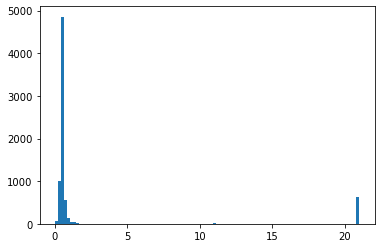

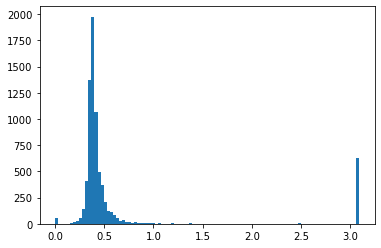

In [31]:
plt.hist(main_df["redundancyMeasure"], bins = 100)
plt.show()

main_df["redundancyMeasure"] = np.log(main_df["redundancyMeasure"]+1)

q = main_df["redundancyMeasure"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

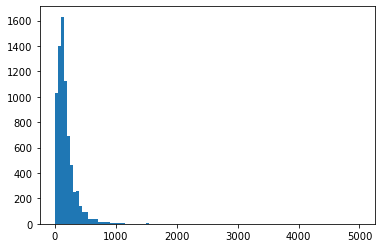

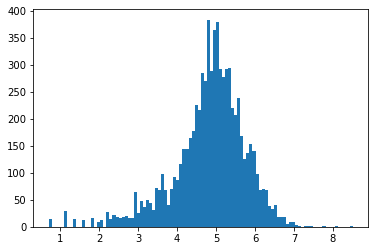

In [32]:
plt.hist(main_df["linksCount"], bins = 100)
plt.show()

main_df["linksCount"] = np.log(main_df["linksCount"]+1)

q = main_df["linksCount"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

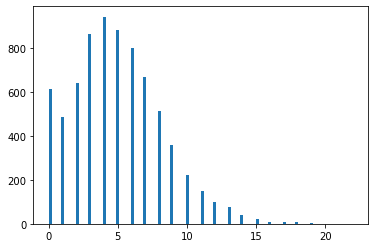

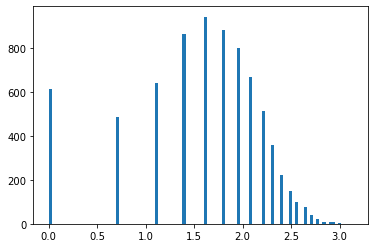

In [33]:
plt.hist(main_df["wordCount"], bins = 100)
plt.show()

main_df["wordCount"] = np.log(main_df["wordCount"]+1)

q = main_df["wordCount"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

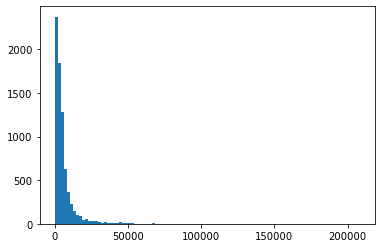

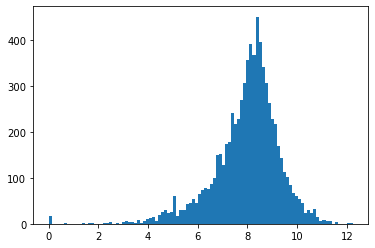

In [34]:
plt.hist(main_df["alphanumCharCount"], bins = 100)
plt.show()

main_df["alphanumCharCount"] = np.log(main_df["alphanumCharCount"]+1)

q = main_df["alphanumCharCount"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

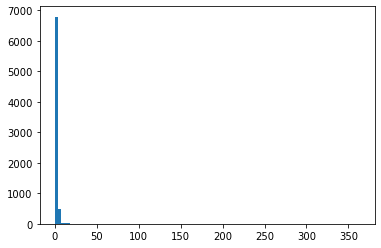

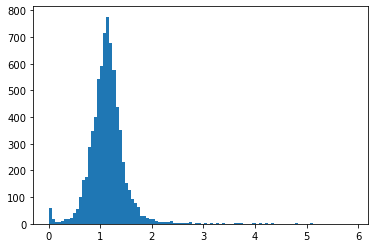

In [35]:
plt.hist(main_df["avgLinkWordLength"], bins = 100)
plt.show()

main_df["avgLinkWordLength"] = np.log(main_df["avgLinkWordLength"]+1)

q = main_df["avgLinkWordLength"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

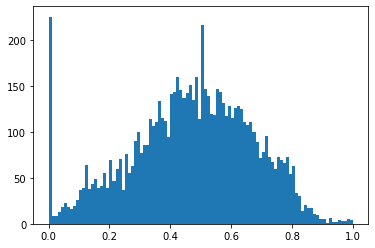

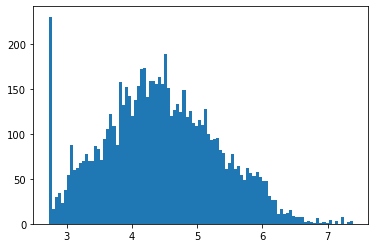

In [36]:
plt.hist(main_df["AvglinkWithOneCommonWord"], bins = 100)
plt.show()

main_df["AvglinkWithOneCommonWord"] = np.exp(main_df["AvglinkWithOneCommonWord"]+1)

q = main_df["AvglinkWithOneCommonWord"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

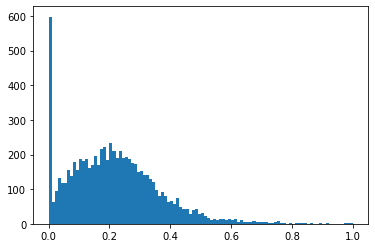

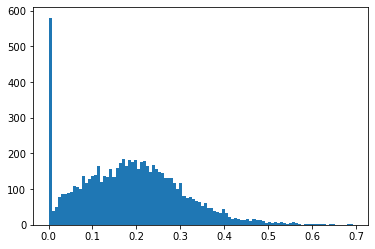

In [37]:
plt.hist(main_df["AvglinkWithTwoCommonWord"], bins = 100)
plt.show()

main_df["AvglinkWithTwoCommonWord"] = np.log(main_df["AvglinkWithTwoCommonWord"]+1)

q = main_df["AvglinkWithTwoCommonWord"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

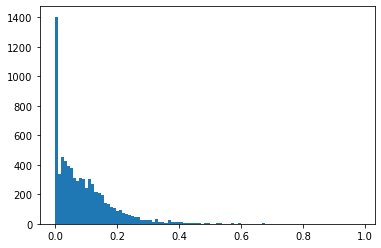

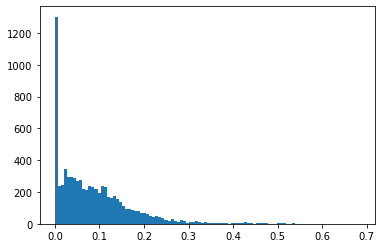

In [38]:
plt.hist(main_df["AvglinkWithThreeCommonWord"], bins = 100)
plt.show()

main_df["AvglinkWithThreeCommonWord"] = np.log(main_df["AvglinkWithThreeCommonWord"]+1)

q = main_df["AvglinkWithThreeCommonWord"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

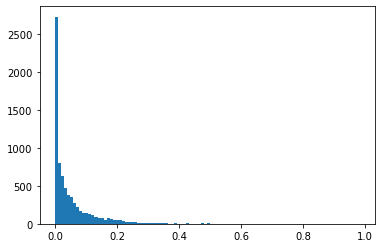

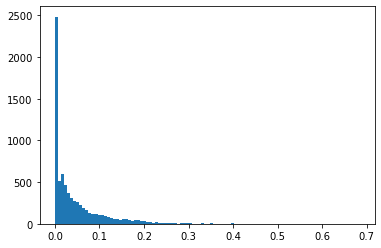

In [39]:
plt.hist(main_df["AvglinkWithFourCommonWord"], bins = 100)
plt.show()

main_df["AvglinkWithFourCommonWord"] = np.log(main_df["AvglinkWithFourCommonWord"]+1)

q = main_df["AvglinkWithFourCommonWord"].to_numpy()
plt.hist(q, bins = 100)
plt.show()

## 1.4 Outlier removal

In [40]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

In [41]:
print(main_df.columns)

Index(['url', 'webpageDescription', 'alchemy_category',
       'alchemy_category_score', 'avgLinkWordLength',
       'AvglinkWithOneCommonWord', 'AvglinkWithTwoCommonWord',
       'AvglinkWithThreeCommonWord', 'AvglinkWithFourCommonWord',
       'redundancyMeasure', 'embedRatio', 'frameTagRatio', 'tagRatio',
       'imageTagRatio', 'isNews', 'lengthyDomain', 'hyperlinkToAllWordsRatio',
       'isFrontPageNews', 'alphanumCharCount', 'linksCount', 'wordCount',
       'parametrizedLinkRatio', 'spellingErrorsRatio', 'label', 'id'],
      dtype='object')


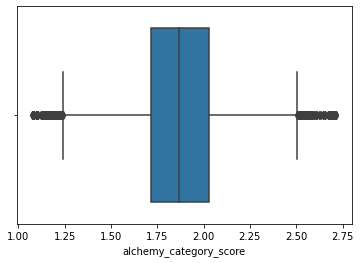

In [42]:
numeric_col = main_df["alchemy_category_score"]
sns.boxplot(x=numeric_col)
plt.show()

In [43]:
outlier_remover = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["alchemy_category_score"] = numeric_col.apply(outlier_remover.removeOutlier)

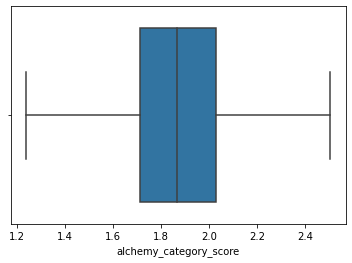

In [44]:
sns.boxplot(x=main_df["alchemy_category_score"])
plt.show()

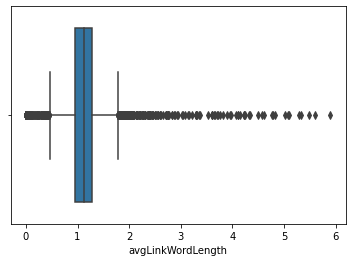

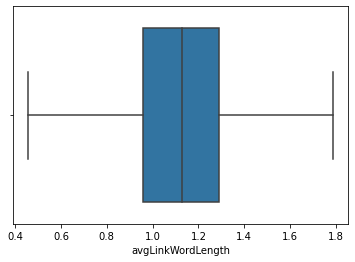

In [45]:
numeric_col = main_df["avgLinkWordLength"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_1 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["avgLinkWordLength"] = numeric_col.apply(outlier_remover_1.removeOutlier)

sns.boxplot(x=main_df["avgLinkWordLength"])
plt.show()

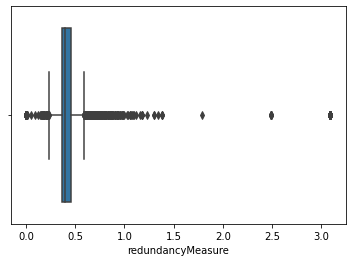

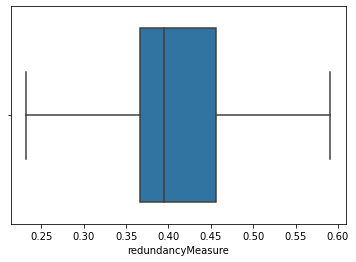

In [46]:
numeric_col = main_df["redundancyMeasure"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_2 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["redundancyMeasure"] = numeric_col.apply(outlier_remover_2.removeOutlier)

sns.boxplot(x=main_df["redundancyMeasure"])
plt.show()

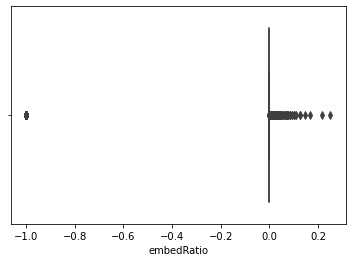

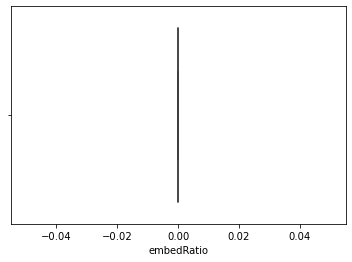

In [47]:
numeric_col = main_df["embedRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_3 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["embedRatio"] = numeric_col.apply(outlier_remover_3.removeOutlier)

sns.boxplot(x=main_df["embedRatio"])
plt.show()

In [48]:
main_df.drop(axis="columns", labels="embedRatio", inplace=True)

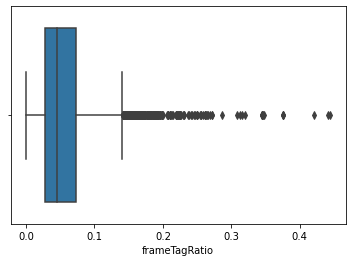

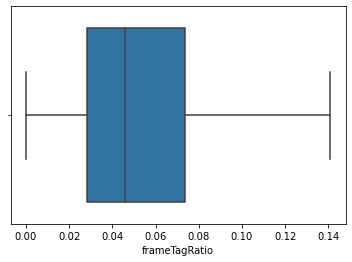

In [49]:
numeric_col = main_df["frameTagRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_4 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["frameTagRatio"] = numeric_col.apply(outlier_remover_4.removeOutlier)

sns.boxplot(x=main_df["frameTagRatio"])
plt.show()

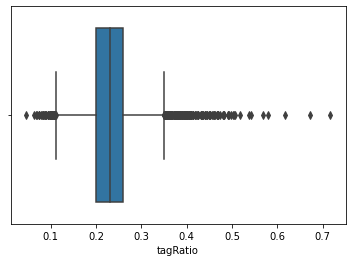

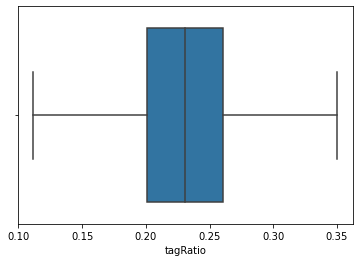

In [50]:
numeric_col = main_df["tagRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_5 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["tagRatio"] = numeric_col.apply(outlier_remover_5.removeOutlier)

sns.boxplot(x=main_df["tagRatio"])
plt.show()

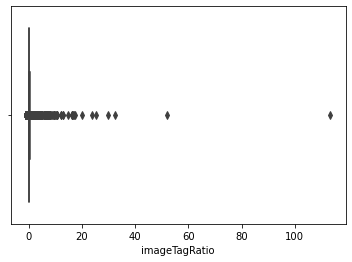

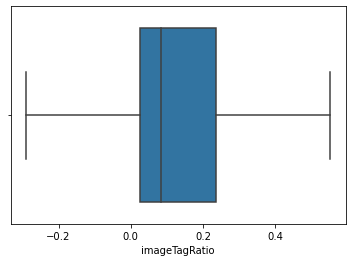

In [51]:
numeric_col = main_df["imageTagRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_6 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["imageTagRatio"] = numeric_col.apply(outlier_remover_6.removeOutlier)

sns.boxplot(x=main_df["imageTagRatio"])
plt.show()

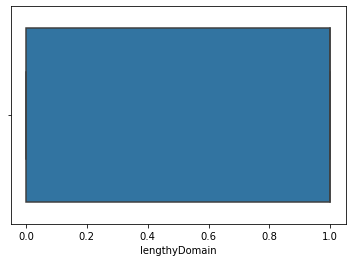

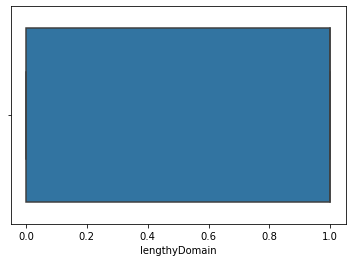

In [52]:
numeric_col = main_df["lengthyDomain"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_7 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["lengthyDomain"] = numeric_col.apply(outlier_remover_7.removeOutlier)

sns.boxplot(x=main_df["lengthyDomain"])
plt.show()

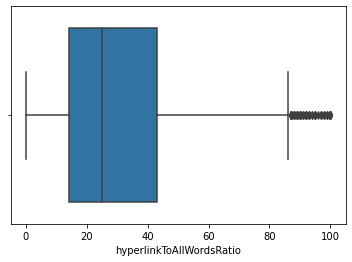

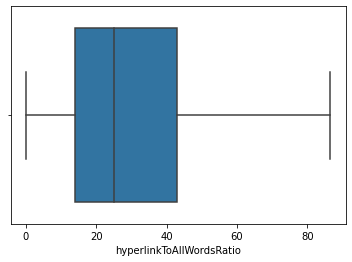

In [53]:
numeric_col = main_df["hyperlinkToAllWordsRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_8 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["hyperlinkToAllWordsRatio"] = numeric_col.apply(outlier_remover_8.removeOutlier)

sns.boxplot(x=main_df["hyperlinkToAllWordsRatio"])
plt.show()

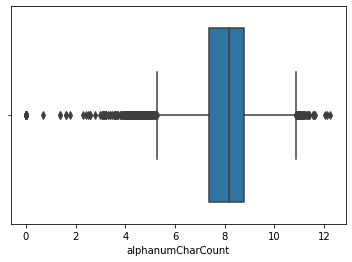

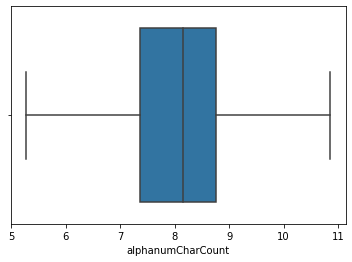

In [54]:
numeric_col = main_df["alphanumCharCount"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_9 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["alphanumCharCount"] = numeric_col.apply(outlier_remover_9.removeOutlier)

sns.boxplot(x=main_df["alphanumCharCount"])
plt.show()

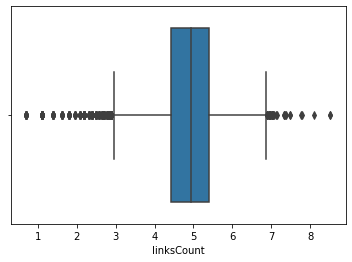

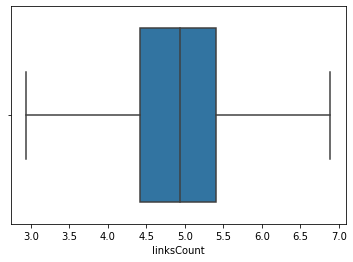

In [55]:
numeric_col = main_df["linksCount"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_10 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["linksCount"] = numeric_col.apply(outlier_remover_10.removeOutlier)

sns.boxplot(x=main_df["linksCount"])
plt.show()

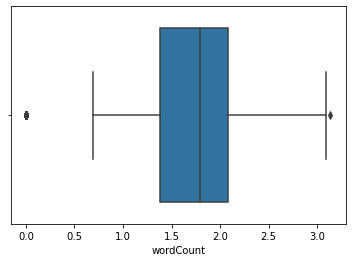

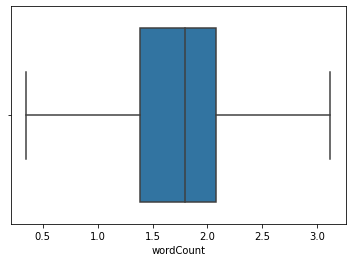

In [56]:
numeric_col = main_df["wordCount"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_11 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["wordCount"] = numeric_col.apply(outlier_remover_11.removeOutlier)

sns.boxplot(x=main_df["wordCount"])
plt.show()

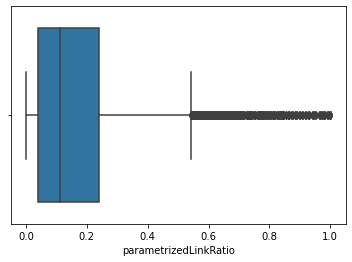

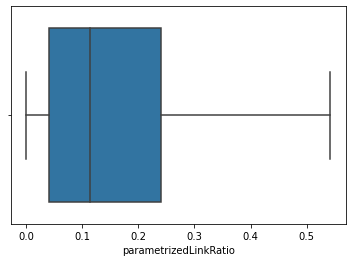

In [57]:
numeric_col = main_df["parametrizedLinkRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_12 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["parametrizedLinkRatio"] = numeric_col.apply(outlier_remover_12.removeOutlier)

sns.boxplot(x=main_df["parametrizedLinkRatio"])
plt.show()

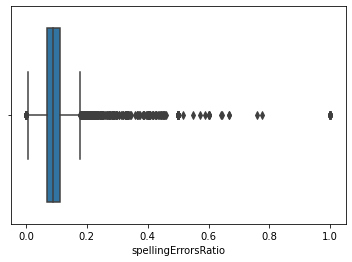

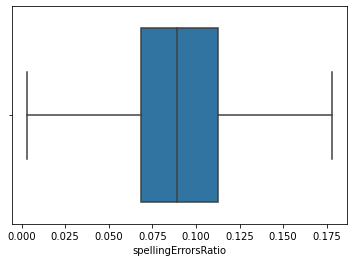

In [58]:
numeric_col = main_df["spellingErrorsRatio"]
sns.boxplot(x=numeric_col)
plt.show()

outlier_remover_13 = OutlierRemoval(numeric_col.quantile(0.25), numeric_col.quantile(0.75))
main_df["spellingErrorsRatio"] = numeric_col.apply(outlier_remover_13.removeOutlier)

sns.boxplot(x=main_df["spellingErrorsRatio"])
plt.show()

## 1.4 One-hot encoding

In [59]:
main_df["alchemy_category"].value_counts()

unknown               2348
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64

Alchemy category is one-hot encoded

In [60]:
column_names_to_one_hot = ["alchemy_category"]
main_df = pd.get_dummies(main_df, columns=column_names_to_one_hot)

In [61]:
main_df.head()

,url,webpageDescription,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,frameTagRatio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,http://www.polyvore.com/cgi/home?id=1389651,"{""title"":""Join Polyvore and follow the latest ...",1.869397,1.070441,2.850855,0.007905,0.000000,0.000000,0.589894,0.027778,...,0,0,0,0,0,0,0,0,1,0
1,http://www.youtube.com/watch?v=ippMPPu6gh4,"{""body"":""Speed Air Man--David Belle david bell...",1.869397,0.814292,3.129977,0.000000,0.000000,0.000000,0.591068,0.015086,...,0,0,0,0,0,0,0,0,1,0
2,http://www.musingsofahousewife.com/2011/03/tri...,"{""title"":""Chicken Gruyere Recipe "",""body"":""Chi...",1.472093,1.106580,5.105662,0.250017,0.209826,0.184265,0.367008,0.033935,...,0,0,0,0,0,0,1,0,0,0
3,http://www.thelittleteochew.com/2011/07/ikan-b...,"{""title"":""Ikan Bilis With Tempeh Groundnuts "",...",1.608077,0.980299,4.135385,0.181739,0.093401,0.064320,0.387063,0.036530,...,0,0,0,0,1,0,0,0,0,0
4,http://recipes.wuzzle.org/index.php/72,"{""url"":""recipes wuzzle org index php 72"",""titl...",1.707464,0.457966,2.818948,0.000000,0.000000,0.000000,0.256666,0.015152,...,0,0,0,0,0,0,0,0,0,0


## 1.5 Replacing webpageDescription with 2-columns "body", "title".

In [62]:
col = main_df["webpageDescription"]

In [63]:
col_name = "body"
col = col.to_numpy()

In [64]:
col_list = []
for i in range(len(col)):
    a = json.loads(col[i])
    if "body" in a.keys() and a["body"]!=' ':
        col_list.append(a["body"])
    else:
        col_list.append("Unkonown")

In [65]:
main_df.insert(1, col_name, col_list)

In [66]:
col_name = "title"

In [67]:
col_list_title = []
for i in range(len(col)):
    a = json.loads(col[i])
    if "title" in a.keys() and a["title"]!=' ':
        col_list_title.append(a["title"])
    else:
        col_list_title.append("Unkonown")
        
len(col_list_title)  

7395

In [68]:
main_df.insert(1, col_name, col_list_title)

In [69]:
main_df.drop(axis="columns", labels="webpageDescription", inplace=True)

In [70]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,http://www.polyvore.com/cgi/home?id=1389651,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...,1.869397,1.070441,2.850855,0.007905,0.000000,0.000000,0.589894,...,0,0,0,0,0,0,0,0,1,0
1,http://www.youtube.com/watch?v=ippMPPu6gh4,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...,1.869397,0.814292,3.129977,0.000000,0.000000,0.000000,0.591068,...,0,0,0,0,0,0,0,0,1,0
2,http://www.musingsofahousewife.com/2011/03/tri...,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...,1.472093,1.106580,5.105662,0.250017,0.209826,0.184265,0.367008,...,0,0,0,0,0,0,1,0,0,0
3,http://www.thelittleteochew.com/2011/07/ikan-b...,Ikan Bilis With Tempeh Groundnuts,Oh me oh my This was really snackalicious swee...,1.608077,0.980299,4.135385,0.181739,0.093401,0.064320,0.387063,...,0,0,0,0,1,0,0,0,0,0
4,http://recipes.wuzzle.org/index.php/72,Malaysian recipes,Barbecued Chicken Chow Siew from The Exotic Ki...,1.707464,0.457966,2.818948,0.000000,0.000000,0.000000,0.256666,...,0,0,0,0,0,0,0,0,0,0


## 1.6 Modifying url column by deleting symbols and strings which are not useful in predictions.

In [71]:
col = main_df["url"]
col = col.to_numpy()
col

array(['http://www.polyvore.com/cgi/home?id=1389651',
       'http://www.youtube.com/watch?v=ippMPPu6gh4',
       'http://www.musingsofahousewife.com/2011/03/tried-and-true-chicken-gruyere.html',
       ...,
       'http://www.laweekly.com/bestof/2011/award/best-belly-dance-workout-1509632/',
       'http://www.kraftrecipes.com/recipes/buffalo-chicken-burgers-118650.aspx?cm_mmc=eml-_-rbe-_-20110526-_-1020',
       'http://canarygirl.com/?p=80'], dtype=object)

In [72]:
charlist = ['/','?','=','-','_','&','(',')','@','$','%','#',':',';',"<",">","."]
for i in range(len(col)):
    col[i] = col[i].replace('http://', '')
    col[i] = col[i].replace('https://', '')
    col[i] = col[i].replace('www.','').replace('.com','').replace('.org','')
    for j in range(len(charlist)):
        col[i] = col[i].replace(charlist[j],' ')
    col[i] = " ".join(col[i].split()) 
    
    
col

array(['polyvore cgi home id 1389651', 'youtube watch v ippMPPu6gh4',
       'musingsofahousewife 2011 03 tried and true chicken gruyere html',
       ..., 'laweekly bestof 2011 award best belly dance workout 1509632',
       'kraftrecipes recipes buffalo chicken burgers 118650 aspx cm mmc eml rbe 20110526 1020',
       'canarygirl p 80'], dtype=object)

In [73]:
main_df["url"] = col

In [74]:
main_df

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,polyvore cgi home id 1389651,Join Polyvore and follow the latest styles,polyvore is the best place to discover or sta...,1.869397,1.070441,2.850855,0.007905,0.000000,0.000000,0.589894,...,0,0,0,0,0,0,0,0,1,0
1,youtube watch v ippMPPu6gh4,Speed Air Man--David Belle,Speed Air Man--David Belle david belle speed a...,1.869397,0.814292,3.129977,0.000000,0.000000,0.000000,0.591068,...,0,0,0,0,0,0,0,0,1,0
2,musingsofahousewife 2011 03 tried and true chi...,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...,1.472093,1.106580,5.105662,0.250017,0.209826,0.184265,0.367008,...,0,0,0,0,0,0,1,0,0,0
3,thelittleteochew 2011 07 ikan bilis with tempe...,Ikan Bilis With Tempeh Groundnuts,Oh me oh my This was really snackalicious swee...,1.608077,0.980299,4.135385,0.181739,0.093401,0.064320,0.387063,...,0,0,0,0,1,0,0,0,0,0
4,recipes wuzzle index php 72,Malaysian recipes,Barbecued Chicken Chow Siew from The Exotic Ki...,1.707464,0.457966,2.818948,0.000000,0.000000,0.000000,0.256666,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,lanascooking 2011 07 08 roasted potato salad,Unkonown,Unkonown,1.976679,0.970779,3.925608,0.097638,0.033617,0.016950,0.591068,...,0,0,0,0,0,0,0,0,0,0
1475,marthastewart 255456 billys chocolate buttercream,Billy s Chocolate Buttercream Martha Stewart R...,Save to your Collections Sorry for the inconve...,1.869397,1.174511,5.348241,0.208901,0.087011,0.020001,0.345951,...,0,0,0,0,0,0,0,0,1,0
1476,laweekly bestof 2011 award best belly dance wo...,Los Angeles Best Belly Dance Workout Swerve St...,Best Belly Dance Workout 2011 Swerve Studio s ...,2.505420,1.040202,4.538926,0.246225,0.054334,0.020101,0.436514,...,0,0,0,0,0,0,0,0,0,0
1477,kraftrecipes recipes buffalo chicken burgers 1...,Buffalo Chicken Burgers recipe buffalo chicken...,outerbanxchic posted 10 14 2011 Delicious and ...,1.869397,1.009167,4.754497,0.204794,0.078643,0.018019,0.453249,...,0,0,0,0,0,0,0,0,1,0


## 1.7 Removing null values in title and body columns.

In [75]:
main_df.isna().sum()

url                                       0
title                                    12
body                                     57
alchemy_category_score                    0
avgLinkWordLength                         0
AvglinkWithOneCommonWord                  0
AvglinkWithTwoCommonWord                  0
AvglinkWithThreeCommonWord                0
AvglinkWithFourCommonWord                 0
redundancyMeasure                         0
frameTagRatio                             0
tagRatio                                  0
imageTagRatio                             0
isNews                                    0
lengthyDomain                             0
hyperlinkToAllWordsRatio                  0
isFrontPageNews                           0
alphanumCharCount                         0
linksCount                                0
wordCount                                 0
parametrizedLinkRatio                     0
spellingErrorsRatio                       0
label                           

In [76]:
main_df["title"].fillna("Unknown", inplace=True)
main_df["body"].fillna("Unknown", inplace=True)

In [77]:
main_df.isna().sum()

url                                       0
title                                     0
body                                      0
alchemy_category_score                    0
avgLinkWordLength                         0
AvglinkWithOneCommonWord                  0
AvglinkWithTwoCommonWord                  0
AvglinkWithThreeCommonWord                0
AvglinkWithFourCommonWord                 0
redundancyMeasure                         0
frameTagRatio                             0
tagRatio                                  0
imageTagRatio                             0
isNews                                    0
lengthyDomain                             0
hyperlinkToAllWordsRatio                  0
isFrontPageNews                           0
alphanumCharCount                         0
linksCount                                0
wordCount                                 0
parametrizedLinkRatio                     0
spellingErrorsRatio                       0
label                           

## 1.8 NLP 

### 1.8.1. Removing Punctuations

In [78]:
def remove_punct(text):
    text_nopunct = "".join([c for c in text if c not in string.punctuation])
    return text_nopunct

body = main_df["body"].to_numpy()
body_chan = []
for i in range(len(body)):
    body[i] = body[i].strip()
    body_chan.append( remove_punct(body[i]))
    
main_df["body"] = body_chan


In [79]:
body = main_df["title"].to_numpy()
body_chan = []
for i in range(len(body)):
    body[i] = body[i].strip()
    body_chan.append( remove_punct(body[i]))
    
main_df["title"] = body_chan

In [80]:
body = main_df["url"].to_numpy()
body_chan = []
for i in range(len(body)):
    body[i] = body[i].strip()
    body_chan.append( remove_punct(body[i]))
    
main_df["url"] = body_chan

In [81]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,polyvore cgi home id 1389651,Join Polyvore and follow the latest styles,polyvore is the best place to discover or star...,1.869397,1.070441,2.850855,0.007905,0.000000,0.000000,0.589894,...,0,0,0,0,0,0,0,0,1,0
1,youtube watch v ippMPPu6gh4,Speed Air ManDavid Belle,Speed Air ManDavid Belle david belle speed air...,1.869397,0.814292,3.129977,0.000000,0.000000,0.000000,0.591068,...,0,0,0,0,0,0,0,0,1,0
2,musingsofahousewife 2011 03 tried and true chi...,Chicken Gruyere Recipe,Chicken Gruyere one of our favorite special di...,1.472093,1.106580,5.105662,0.250017,0.209826,0.184265,0.367008,...,0,0,0,0,0,0,1,0,0,0
3,thelittleteochew 2011 07 ikan bilis with tempe...,Ikan Bilis With Tempeh Groundnuts,Oh me oh my This was really snackalicious swee...,1.608077,0.980299,4.135385,0.181739,0.093401,0.064320,0.387063,...,0,0,0,0,1,0,0,0,0,0
4,recipes wuzzle index php 72,Malaysian recipes,Barbecued Chicken Chow Siew from The Exotic Ki...,1.707464,0.457966,2.818948,0.000000,0.000000,0.000000,0.256666,...,0,0,0,0,0,0,0,0,0,0


### 1.8.2. Tokenization

In [82]:
def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens

token_change = []
tok = main_df["body"].to_numpy()
for i in range(len(tok)):
    token_change.append(tokenize(tok[i]))
    
main_df["body"] = token_change  

In [83]:
token_change = []
tok = main_df["title"].to_numpy()
for i in range(len(tok)):
    token_change.append(tokenize(tok[i]))
    
main_df["title"] = token_change  

In [84]:
token_change = []
tok = main_df["url"].to_numpy()
for i in range(len(tok)):
    token_change.append(tokenize(tok[i]))
    
main_df["url"] = token_change  

In [85]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,"[polyvore, cgi, home, id, 1389651]","[Join, Polyvore, and, follow, the, latest, sty...","[polyvore, is, the, best, place, to, discover,...",1.869397,1.070441,2.850855,0.007905,0.000000,0.000000,0.589894,...,0,0,0,0,0,0,0,0,1,0
1,"[youtube, watch, v, ippMPPu6gh4]","[Speed, Air, ManDavid, Belle]","[Speed, Air, ManDavid, Belle, david, belle, sp...",1.869397,0.814292,3.129977,0.000000,0.000000,0.000000,0.591068,...,0,0,0,0,0,0,0,0,1,0
2,"[musingsofahousewife, 2011, 03, tried, and, tr...","[Chicken, Gruyere, Recipe]","[Chicken, Gruyere, one, of, our, favorite, spe...",1.472093,1.106580,5.105662,0.250017,0.209826,0.184265,0.367008,...,0,0,0,0,0,0,1,0,0,0
3,"[thelittleteochew, 2011, 07, ikan, bilis, with...","[Ikan, Bilis, With, Tempeh, Groundnuts]","[Oh, me, oh, my, This, was, really, snackalici...",1.608077,0.980299,4.135385,0.181739,0.093401,0.064320,0.387063,...,0,0,0,0,1,0,0,0,0,0
4,"[recipes, wuzzle, index, php, 72]","[Malaysian, recipes]","[Barbecued, Chicken, Chow, Siew, from, The, Ex...",1.707464,0.457966,2.818948,0.000000,0.000000,0.000000,0.256666,...,0,0,0,0,0,0,0,0,0,0


### 1.8.3. Remove Stop words

In [86]:
stopwords = nltk.corpus.stopwords.words('english')

In [87]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

stop_list = main_df["body"].to_numpy()
stop_list_change = []
for i in range(len(stop_list)):
    stop_list_change.append(remove_stopwords(stop_list[i]))
    
main_df["body"] = stop_list_change

In [88]:
stop_list = main_df["title"].to_numpy()
stop_list_change = []
for i in range(len(stop_list)):
    stop_list_change.append(remove_stopwords(stop_list[i]))
    
main_df["title"] = stop_list_change

In [89]:
stop_list = main_df["url"].to_numpy()
stop_list_change = []
for i in range(len(stop_list)):
    stop_list_change.append(remove_stopwords(stop_list[i]))
    
main_df["url"] = stop_list_change

In [90]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,"[polyvore, cgi, home, id, 1389651]","[Join, Polyvore, follow, latest, styles]","[polyvore, best, place, discover, start, fashi...",1.869397,1.070441,2.850855,0.007905,0.000000,0.000000,0.589894,...,0,0,0,0,0,0,0,0,1,0
1,"[youtube, watch, v, ippMPPu6gh4]","[Speed, Air, ManDavid, Belle]","[Speed, Air, ManDavid, Belle, david, belle, sp...",1.869397,0.814292,3.129977,0.000000,0.000000,0.000000,0.591068,...,0,0,0,0,0,0,0,0,1,0
2,"[musingsofahousewife, 2011, 03, tried, true, c...","[Chicken, Gruyere, Recipe]","[Chicken, Gruyere, one, favorite, special, din...",1.472093,1.106580,5.105662,0.250017,0.209826,0.184265,0.367008,...,0,0,0,0,0,0,1,0,0,0
3,"[thelittleteochew, 2011, 07, ikan, bilis, temp...","[Ikan, Bilis, With, Tempeh, Groundnuts]","[Oh, oh, This, really, snackalicious, sweet, s...",1.608077,0.980299,4.135385,0.181739,0.093401,0.064320,0.387063,...,0,0,0,0,1,0,0,0,0,0
4,"[recipes, wuzzle, index, php, 72]","[Malaysian, recipes]","[Barbecued, Chicken, Chow, Siew, The, Exotic, ...",1.707464,0.457966,2.818948,0.000000,0.000000,0.000000,0.256666,...,0,0,0,0,0,0,0,0,0,0


### 1.8.4. Lemmatizing

In [91]:
wnl = nltk.WordNetLemmatizer()

In [92]:
def lemmatizing(tokenized_text):
    text = [wnl.lemmatize(word) for word in tokenized_text]
    return text

In [93]:
lemmatize_list = main_df["url"].to_numpy()
lemmatized_list = []
for i in range(len(lemmatize_list)):
    lemmatized_list.append(lemmatizing(lemmatize_list[i]))
    
main_df["url"] = lemmatized_list

In [94]:
lemmatize_list = main_df["title"].to_numpy()
lemmatized_list = []
for i in range(len(lemmatize_list)):
    lemmatized_list.append(lemmatizing(lemmatize_list[i]))
    
main_df["title"] = lemmatized_list

In [95]:
lemmatize_list = main_df["body"].to_numpy()
lemmatized_list = []
for i in range(len(lemmatize_list)):
    lemmatized_list.append(lemmatizing(lemmatize_list[i]))
    
main_df["body"] = lemmatized_list

In [96]:
# st = nltk.PorterStemmer() 

In [97]:
# def stemming(tokenized_text):
#     text = [st.stem(word) for word in tokenized_text]
#     return text

In [98]:
# stem_list = main_df["url"].to_numpy()
# stemmed_list = []
# for i in range(len(stem_list)):
#     stemmed_list.append(stemming(stem_list[i]))
    
# main_df["url"] = stemmed_list

In [99]:
# stem_list = main_df["title"].to_numpy()
# stemmed_list = []
# for i in range(len(stem_list)):
#     stemmed_list.append(stemming(stem_list[i]))
    
# main_df["title"] = stemmed_list

In [100]:
# stem_list = main_df["body"].to_numpy()
# stemmed_list = []
# for i in range(len(stem_list)):
#     stemmed_list.append(stemming(stem_list[i]))
    
# main_df["body"] = stemmed_list

In [101]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,"[polyvore, cgi, home, id, 1389651]","[Join, Polyvore, follow, latest, style]","[polyvore, best, place, discover, start, fashi...",1.869397,1.070441,2.850855,0.007905,0.000000,0.000000,0.589894,...,0,0,0,0,0,0,0,0,1,0
1,"[youtube, watch, v, ippMPPu6gh4]","[Speed, Air, ManDavid, Belle]","[Speed, Air, ManDavid, Belle, david, belle, sp...",1.869397,0.814292,3.129977,0.000000,0.000000,0.000000,0.591068,...,0,0,0,0,0,0,0,0,1,0
2,"[musingsofahousewife, 2011, 03, tried, true, c...","[Chicken, Gruyere, Recipe]","[Chicken, Gruyere, one, favorite, special, din...",1.472093,1.106580,5.105662,0.250017,0.209826,0.184265,0.367008,...,0,0,0,0,0,0,1,0,0,0
3,"[thelittleteochew, 2011, 07, ikan, bilis, temp...","[Ikan, Bilis, With, Tempeh, Groundnuts]","[Oh, oh, This, really, snackalicious, sweet, s...",1.608077,0.980299,4.135385,0.181739,0.093401,0.064320,0.387063,...,0,0,0,0,1,0,0,0,0,0
4,"[recipe, wuzzle, index, php, 72]","[Malaysian, recipe]","[Barbecued, Chicken, Chow, Siew, The, Exotic, ...",1.707464,0.457966,2.818948,0.000000,0.000000,0.000000,0.256666,...,0,0,0,0,0,0,0,0,0,0


### 1.8.5. Vectorizing Data

In [102]:
body_data = main_df["body"].to_numpy()
body_data_combined = [' '.join(i) for i in body_data]
main_df["body"] = body_data_combined

title_data = main_df["title"].to_numpy()
title_data_combined = [' '.join(i) for i in title_data]
main_df["title"] = title_data_combined

url_data = main_df["url"].to_numpy()
url_data_combined = [' '.join(i) for i in url_data]
main_df["url"] = url_data_combined

In [103]:
main_df.head()

,url,title,body,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
0,polyvore cgi home id 1389651,Join Polyvore follow latest style,polyvore best place discover start fashion tre...,1.869397,1.070441,2.850855,0.007905,0.000000,0.000000,0.589894,...,0,0,0,0,0,0,0,0,1,0
1,youtube watch v ippMPPu6gh4,Speed Air ManDavid Belle,Speed Air ManDavid Belle david belle speed air...,1.869397,0.814292,3.129977,0.000000,0.000000,0.000000,0.591068,...,0,0,0,0,0,0,0,0,1,0
2,musingsofahousewife 2011 03 tried true chicken...,Chicken Gruyere Recipe,Chicken Gruyere one favorite special dinner I ...,1.472093,1.106580,5.105662,0.250017,0.209826,0.184265,0.367008,...,0,0,0,0,0,0,1,0,0,0
3,thelittleteochew 2011 07 ikan bilis tempeh gro...,Ikan Bilis With Tempeh Groundnuts,Oh oh This really snackalicious sweet salty sp...,1.608077,0.980299,4.135385,0.181739,0.093401,0.064320,0.387063,...,0,0,0,0,1,0,0,0,0,0
4,recipe wuzzle index php 72,Malaysian recipe,Barbecued Chicken Chow Siew The Exotic Kitchen...,1.707464,0.457966,2.818948,0.000000,0.000000,0.000000,0.256666,...,0,0,0,0,0,0,0,0,0,0


In [104]:
main_df.describe()

,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,frameTagRatio,tagRatio,imageTagRatio,...,alchemy_category_culture_politics,alchemy_category_gaming,alchemy_category_health,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.00000,7395.000000,7395.000000,7395.000000
mean,1.869713,1.128277,4.430076,0.186979,0.084568,0.045948,0.420341,0.054424,0.232441,0.137541,...,0.046383,0.010277,0.068425,0.004192,0.166193,0.009736,0.03908,0.051386,0.317512,0.000541
std,0.306335,0.281550,0.877527,0.117388,0.081797,0.063697,0.086000,0.034233,0.047146,0.223536,...,0.210327,0.100861,0.252490,0.064614,0.372279,0.098198,0.19380,0.220799,0.465540,0.023253
min,1.238949,0.457966,2.718282,0.000000,0.000000,0.000000,0.231693,0.000000,0.111499,-0.290300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.713876,0.956304,3.820456,0.100083,0.021979,0.000000,0.366458,0.028502,0.201061,0.025900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.869397,1.127600,4.399459,0.184364,0.066375,0.021979,0.394525,0.045775,0.230564,0.083051,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.030494,1.288530,5.035959,0.262364,0.125163,0.063036,0.456302,0.073459,0.260770,0.236700,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,2.505420,1.786869,7.389056,0.693147,0.683295,0.683295,0.591068,0.140893,0.350332,0.552900,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [105]:
main_df["id"]

0       3711
1       7222
2       3964
3       3697
4       4321
        ... 
1474    3336
1475    2867
1476     738
1477    4124
1478    6056
Name: id, Length: 7395, dtype: int64

In [106]:
main_df['label_out'] = main_df['label']
main_df['id_out'] = main_df['id']

In [107]:
main_df["total_description"] = main_df["title"] + main_df["body"] + main_df["url"]

In [108]:
columns_to_be_deleted = ["title", "body","url", "label","id"] 
main_df.drop(axis="columns", labels=columns_to_be_deleted, inplace=True)

### Using Count Vectorizer

In [109]:
# cv = CountVectorizer(stop_words = {'english'},max_features = 300)
# count_vector_body = cv.fit_transform(main_df["total_description"])
# print(count_vector_body.shape)

In [110]:
# names_list = cv.get_feature_names()
# len(names_list)
# count_vector_body = count_vector_body.todense() 

### Using Tfidf

In [111]:
tfidf_vect = TfidfVectorizer(stop_words = {'english'}, max_features = 3000)
X_tfidf = tfidf_vect.fit_transform(main_df['total_description'])
print(X_tfidf.shape)

(7395, 3000)


In [112]:
names_list = tfidf_vect.get_feature_names()
len(names_list)
tfidf = X_tfidf.todense() 

In [113]:
df = pd.DataFrame(tfidf, columns = names_list) 

In [114]:
main_df_list = main_df.to_numpy() 
column_names = main_df.columns
main_df = pd.DataFrame(main_df_list, columns = column_names)

In [115]:
main_df

,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,frameTagRatio,tagRatio,imageTagRatio,...,alchemy_category_law_crime,alchemy_category_recreation,alchemy_category_religion,alchemy_category_science_technology,alchemy_category_sports,alchemy_category_unknown,alchemy_category_weather,label_out,id_out,total_description
0,1.869397,1.070441,2.850855,0.007905,0.0,0.0,0.589894,0.027778,0.203161,0.5529,...,0,0,0,0,0,1,0,1.0,3711,Join Polyvore follow latest stylepolyvore best...
1,1.869397,0.814292,3.129977,0.0,0.0,0.0,0.591068,0.015086,0.168189,0.5529,...,0,0,0,0,0,1,0,1.0,7222,Speed Air ManDavid BelleSpeed Air ManDavid Bel...
2,1.472093,1.10658,5.105662,0.250017,0.209826,0.184265,0.367008,0.033935,0.192652,0.126582,...,0,0,0,1,0,0,0,1.0,3964,Chicken Gruyere RecipeChicken Gruyere one favo...
3,1.608077,0.980299,4.135385,0.181739,0.093401,0.06432,0.387063,0.03653,0.198,0.135593,...,0,1,0,0,0,0,0,1.0,3697,Ikan Bilis With Tempeh GroundnutsOh oh This re...
4,1.707464,0.457966,2.818948,0.0,0.0,0.0,0.256666,0.015152,0.241564,0.054217,...,0,0,0,0,0,0,0,1.0,4321,Malaysian recipeBarbecued Chicken Chow Siew Th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,1.976679,0.970779,3.925608,0.097638,0.033617,0.01695,0.591068,0.071719,0.237913,-0.2903,...,0,0,0,0,0,0,0,NaN,3336,UnkonownUnkonownlanascooking 2011 07 08 roaste...
7391,1.869397,1.174511,5.348241,0.208901,0.087011,0.020001,0.345951,0.056471,0.237229,0.024793,...,0,0,0,0,0,1,0,NaN,2867,Billy Chocolate Buttercream Martha Stewart Rec...
7392,2.50542,1.040202,4.538926,0.246225,0.054334,0.020101,0.436514,0.04129,0.21018,0.433526,...,0,0,0,0,0,0,0,NaN,738,Los Angeles Best Belly Dance Workout Swerve St...
7393,1.869397,1.009167,4.754497,0.204794,0.078643,0.018019,0.453249,0.070261,0.190801,0.5529,...,0,0,0,0,0,1,0,NaN,4124,Buffalo Chicken Burgers recipe buffalo chicken...


In [116]:
main_df = pd.concat([main_df,df], axis = 1)

In [117]:
columns_to_be_deleted = ["total_description"]
main_df.drop(axis="columns", labels=columns_to_be_deleted, inplace=True)

In [118]:
main_df["label_out"].isna().sum()

1479

In [119]:
main_df

,alchemy_category_score,avgLinkWordLength,AvglinkWithOneCommonWord,AvglinkWithTwoCommonWord,AvglinkWithThreeCommonWord,AvglinkWithFourCommonWord,redundancyMeasure,frameTagRatio,tagRatio,imageTagRatio,...,you,young,your,youre,youtube,yum,yummy,zest,zone,zucchini
0,1.869397,1.070441,2.850855,0.007905,0.0,0.0,0.589894,0.027778,0.203161,0.5529,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1.869397,0.814292,3.129977,0.0,0.0,0.0,0.591068,0.015086,0.168189,0.5529,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,1.472093,1.10658,5.105662,0.250017,0.209826,0.184265,0.367008,0.033935,0.192652,0.126582,...,0.058072,0.0,0.0,0.0,0.0,0.045205,0.0,0.0,0.0,0.0
3,1.608077,0.980299,4.135385,0.181739,0.093401,0.06432,0.387063,0.03653,0.198,0.135593,...,0.019461,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1.707464,0.457966,2.818948,0.0,0.0,0.0,0.256666,0.015152,0.241564,0.054217,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,1.976679,0.970779,3.925608,0.097638,0.033617,0.01695,0.591068,0.071719,0.237913,-0.2903,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7391,1.869397,1.174511,5.348241,0.208901,0.087011,0.020001,0.345951,0.056471,0.237229,0.024793,...,0.040439,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7392,2.50542,1.040202,4.538926,0.246225,0.054334,0.020101,0.436514,0.04129,0.21018,0.433526,...,0.023663,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7393,1.869397,1.009167,4.754497,0.204794,0.078643,0.018019,0.453249,0.070261,0.190801,0.5529,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [120]:
main_df.describe()

,00,000,01,02,03,04,05,06,07,08,...,you,young,your,youre,youtube,yum,yummy,zest,zone,zucchini
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,...,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,0.001946,0.003347,0.002842,0.003207,0.002825,0.003405,0.002950,0.002475,0.003070,0.003327,...,0.011420,0.001933,0.005036,0.001199,0.001614,0.000783,0.001299,0.001684,0.000661,0.002347
std,0.025414,0.022833,0.023438,0.025277,0.024095,0.029275,0.021842,0.019190,0.025241,0.026224,...,0.026450,0.013426,0.022905,0.014286,0.017827,0.009604,0.011086,0.014450,0.011699,0.033866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.792484,0.973723,0.763662,0.623520,0.840939,0.752708,0.531439,0.594531,0.560246,0.553521,...,0.532334,0.411285,0.541368,0.396205,0.680569,0.494492,0.285939,0.306863,0.758308,0.800716


### Test - Train Split

In [121]:
train_df = main_df.loc[main_df["label_out"].isna() == False,:]
test_df = main_df.loc[main_df["label_out"].isna(),:].drop(columns="label_out")

train_df = train_df.drop(columns="id_out")

In [122]:
train_df.describe()

,00,000,01,02,03,04,05,06,07,08,...,you,young,your,youre,youtube,yum,yummy,zest,zone,zucchini
count,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,...,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000
mean,0.001979,0.002991,0.002894,0.003105,0.002845,0.003581,0.003100,0.002516,0.003104,0.003215,...,0.011516,0.001947,0.005014,0.001361,0.001692,0.000812,0.001355,0.001775,0.000719,0.002340
std,0.025099,0.016532,0.023133,0.025206,0.023714,0.030247,0.021825,0.019547,0.025643,0.025805,...,0.026660,0.013810,0.022719,0.015662,0.018233,0.010139,0.011521,0.014793,0.012861,0.034100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.792484,0.361182,0.763662,0.623520,0.840939,0.752708,0.429440,0.594531,0.560246,0.553521,...,0.532334,0.411285,0.392855,0.396205,0.680569,0.494492,0.285939,0.306863,0.758308,0.800716


In [123]:
test_df["id_out"]

5916    7172
5917    2687
5918    6990
5919    5639
5920    2701
        ... 
7390    3336
7391    2867
7392     738
7393    4124
7394    6056
Name: id_out, Length: 1479, dtype: object

/home/sai/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label_out', ylabel='count'>

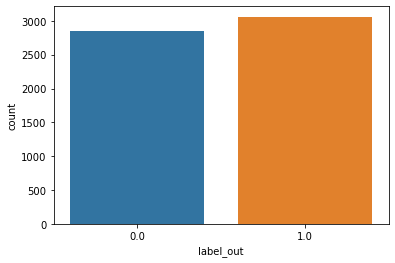

In [124]:
sns.countplot(train_df["label_out"])

In [125]:
main_x = train_df.drop(columns="label_out").to_numpy().astype("float")
main_y = train_df["label_out"].to_numpy().astype("float")

train_x, test_x, train_y, test_y = train_test_split(main_x, main_y, train_size=0.6, stratify=main_y)

# 2. Model Prediction

In [126]:
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)

test_x_scaled = scaler.transform(test_x)

In [127]:
pca = PCA(n_components=300)
train_x_pca = pca.fit_transform(train_x_scaled)
test_x_pca = pca.transform(test_x_scaled)

## 2.1 Logistic Regression

In [128]:
logistic_regression_model = LogisticRegression(max_iter=10000, class_weight = "balanced", C=0.5)
logistic_regression_model.fit(train_x_pca, train_y)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=10000)

In [129]:
test_yhat = logistic_regression_model.predict_proba(test_x_pca)[:,-1]

In [130]:
metrics.roc_auc_score(test_y, test_yhat)

0.8540204941702549

## 2.2 Naive bayes

In [131]:
gnb = GaussianNB()
gnb.fit(train_x_pca, train_y)

GaussianNB()

In [132]:
nb_test_yhat = gnb.predict_proba(test_x_pca)[:,-1]

In [133]:
metrics.roc_auc_score(test_y, nb_test_yhat)

0.7756695343637601

## 2.3 SVM

In [134]:
clf = SVC(kernel = 'rbf',class_weight = "balanced",C = 0.5, probability = True)
clf.fit(train_x_pca, train_y)

SVC(C=0.5, class_weight='balanced', probability=True)

In [135]:
test_yhat = clf.predict_proba(test_x_pca)[:,-1]

In [136]:
metrics.roc_auc_score(test_y, test_yhat)

0.8660924124680494

### SVM with PCA

In [137]:
clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",C = 0.5, probability = True)
clf_pca.fit(train_x_pca, train_y)

SVC(C=0.5, class_weight='balanced', probability=True)

In [138]:
test_yhat = clf_pca.predict_proba(test_x_pca)[:,-1]

In [139]:
metrics.roc_auc_score(test_y, test_yhat)

0.8660924124680494

## 2.4 ADABOOST


In [140]:
clf1 = AdaBoostClassifier(n_estimators=1000, random_state=0,learning_rate = 0.1)
clf1.fit(train_x_pca, train_y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)

In [141]:
test_yhat_ada = clf1.predict_proba(test_x_pca)[:,-1]

In [142]:
metrics.roc_auc_score(test_y, test_yhat_ada)

0.8571690997775605

## 2.5 Bagging

In [143]:
bagg = BaggingClassifier(base_estimator=SVC(),n_estimators=1000, random_state=0, max_samples = 30)
bagg.fit(train_x_pca, train_y)

BaggingClassifier(base_estimator=SVC(), max_samples=30, n_estimators=1000,
                  random_state=0)

In [144]:
test_yhat_bag = bagg.predict_proba(test_x_pca)[:,-1]

In [145]:
metrics.roc_auc_score(test_y, test_yhat_bag)

0.8530201596532458

### Mixing ADAboost and bagging

In [146]:
test_yhat_new = np.maximum(test_yhat_bag,test_yhat_ada)

In [147]:
metrics.roc_auc_score(test_y, test_yhat_new)

0.8536034200790261

## 2.6 Decision Tree

In [148]:
dt = DecisionTreeClassifier(class_weight = "balanced" ,random_state=0)
dt.fit(train_x_pca, train_y)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [149]:
test_yhat_dt = dt.predict_proba(test_x_pca)[:,-1]

In [150]:
metrics.roc_auc_score(test_y, test_yhat_dt)

0.732360660799753

## 2.7 XGBoost

In [153]:
xgbc = xgb.XGBClassifier(n_estimators=1000, random_state=0,learning_rate = 0.1,use_label_encoder=False)
xgbc.fit(train_x_pca, train_y)

[12:09:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [154]:
test_yhat_xgbc = xgbc.predict_proba(test_x_pca)[:,-1]

In [155]:
metrics.roc_auc_score(test_y, test_yhat_xgbc)

0.862372697693834

## 2.8 Neural networks

In [156]:
nn = MLPClassifier(hidden_layer_sizes=(40,50,60,70,60,50,40), activation='logistic', solver='adam', max_iter=5000, alpha=1e-5)
nn.fit(train_x_pca, train_y)

MLPClassifier(activation='logistic', alpha=1e-05,
              hidden_layer_sizes=(40, 50, 60, 70, 60, 50, 40), max_iter=5000)

In [157]:
test_yhat_clf = nn.predict_proba(test_x_pca)[:,-1]

In [158]:
metrics.roc_auc_score(test_y, test_yhat_clf)

0.8565379490962323

## 3 Kaggle submission

In [159]:
main_x_scaled = scaler.fit_transform(main_x)

In [160]:
kaggle_test_X = test_df.drop(columns="id_out", inplace=False).to_numpy().astype("float")

kaggle_x_scaled = scaler.fit_transform(kaggle_test_X)

kaggle_test_X.shape

(1479, 3032)

In [161]:
main_x_pca = pca.fit_transform(main_x_scaled)

In [162]:
kaggle_x_pca = pca.transform(kaggle_x_scaled)

In [163]:
testdf_new = test_df["id_out"]

In [164]:
testdf_new = testdf_new.to_frame()

In [165]:
testdf_new["id"] = test_df["id_out"]
testdf_new.drop(columns="id_out",inplace=True)

### Logistic regression

In [166]:
logistic_regression_model.fit(main_x_pca,main_y)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=10000)

In [167]:
kaggle_test_yhat = logistic_regression_model.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_Logistic_sub.csv", index=False)

### Naive Bayes

In [168]:
gnb.fit(main_x_pca,main_y)

GaussianNB()

In [169]:
bayes_kaggle_test_yhat = gnb.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = bayes_kaggle_test_yhat 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_Bayes_sub.csv", index=False)

## svm

In [170]:
clf.fit(main_x_pca,main_y)

SVC(C=0.5, class_weight='balanced', probability=True)

In [171]:
kaggle_test_yhat = clf.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_svm_sub.csv", index=False)

### SVM with PCA

In [172]:
clf_pca.fit(main_x_pca,main_y)

SVC(C=0.5, class_weight='balanced', probability=True)

In [173]:
kaggle_test_yhat = clf_pca.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_svm_pca_sub.csv", index=False)

## ADABOOST

In [174]:
clf1.fit(main_x_pca,main_y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)

In [175]:
kaggle_test_yhat_ada = clf1.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat_ada 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_adaboost_sub.csv", index=False)

## Bagging

In [176]:
bagg.fit(main_x_pca,main_y)

BaggingClassifier(base_estimator=SVC(), max_samples=30, n_estimators=1000,
                  random_state=0)

In [177]:
kaggle_test_yhat_bagging = bagg.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat_bagging 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_bagging_sub.csv", index=False)

## Mixing ADAboost and bagging

In [178]:
kaggle_test_yhat_mix = (kaggle_test_yhat_bagging+kaggle_test_yhat_ada)/2

In [179]:
testdf_new["label"] = kaggle_test_yhat_mix 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_mix_sub.csv", index=False)

## Decision Tree

In [180]:
dt.fit(main_x_pca,main_y)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [181]:
kaggle_test_yhat = dt.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_decisiontree_sub.csv", index=False)

## XGBoost

In [182]:
xgbc.fit(main_x_pca,main_y)

[12:19:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [183]:
kaggle_test_yhat = xgbc.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_adaboost_sub.csv", index=False)

## Neural networks

In [ ]:
nn.fit(main_x_pca,main_y)

In [ ]:
kaggle_test_yhat = nn.predict_proba(kaggle_x_pca)[:,-1]
testdf_new["label"] = kaggle_test_yhat 
to_submit = testdf_new[["id", "label"]]
to_submit.to_csv("phantom_neural_network_sub.csv", index=False)